In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aqi_data = pd.read_csv(r'C:\Users\tapan\Documents\Tapan\machine_learning_notes\Tapan_ML_Projects\Air_Quality_Index\Data\Final_Data\Real_Combine.csv')

In [3]:
aqi_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
aqi_data.shape


(1093, 9)

In [5]:
aqi_data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [6]:
aqi_data.shape

(1093, 9)

In [7]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


<b> 1 row has a null value for the target variable PM 2.5. Removing the row with null value </b>

In [8]:
aqi_data['PM 2.5'].isnull().sum()

1

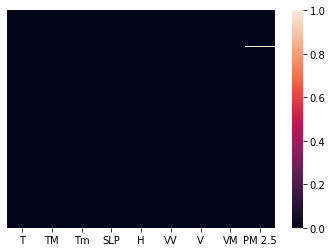

In [9]:
sns.heatmap(aqi_data.isnull(),yticklabels=False)

In [10]:
aqi_data.dropna(inplace=True)

In [11]:
aqi_data['PM 2.5'].isnull().sum()

0

In [12]:
aqi_data.shape

(1092, 9)

In [13]:
len(aqi_data.columns)

9

In [14]:
X = aqi_data.iloc[:,:len(aqi_data.columns)-1]   # independent features
y = aqi_data.iloc[:,-1]   # target variable/dependent feature

In [15]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [16]:
X.shape

(1092, 8)

In [17]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [18]:
y.shape

(1092,)

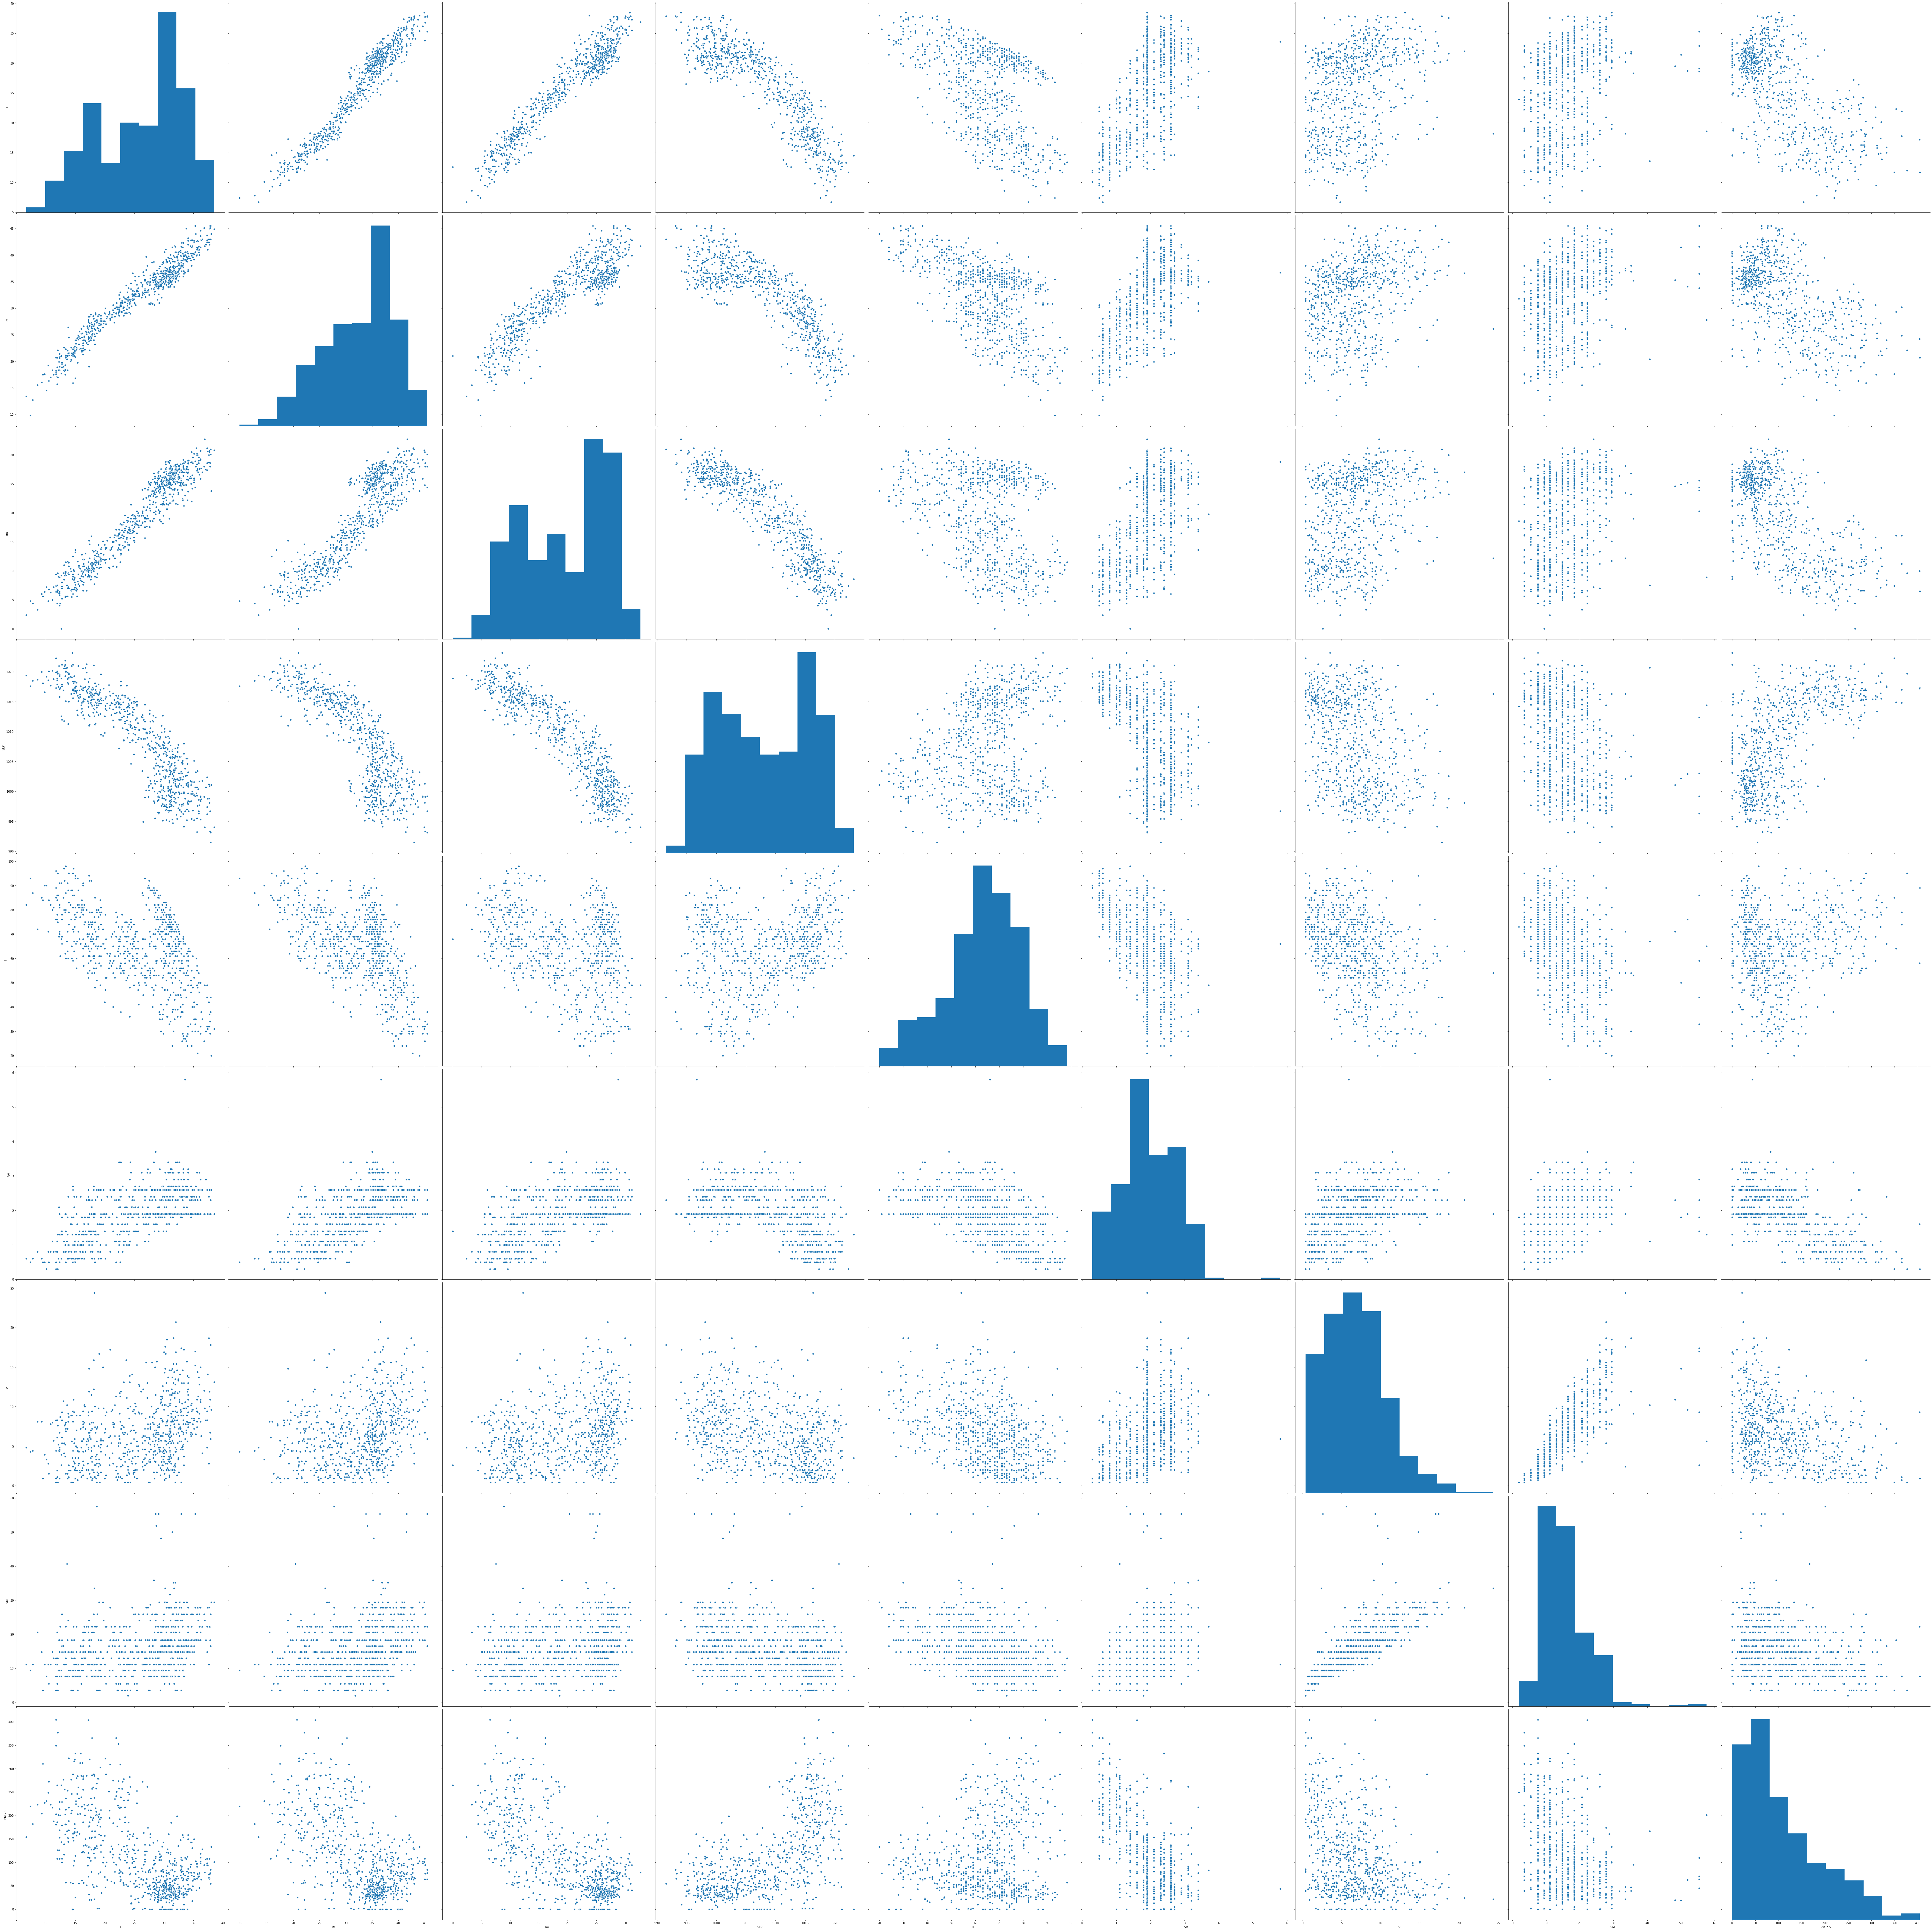

In [19]:
sns.pairplot(aqi_data,height=10)

In [20]:
aqi_data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


In [22]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [27]:
model.feature_importances_

array([0.1678321 , 0.09177916, 0.21621351, 0.16272826, 0.08726923,
       0.18047075, 0.05278594, 0.04092107])

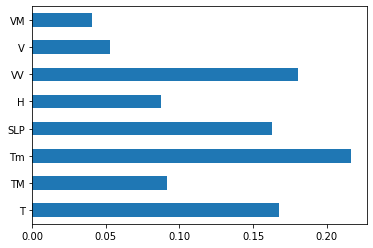

In [30]:
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.plot(kind='barh')
plt.show()

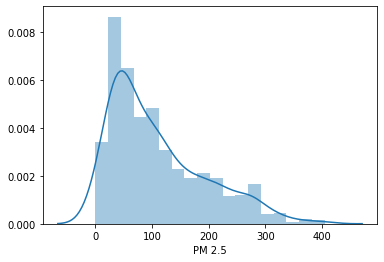

In [31]:
sns.distplot(y)

In [32]:
aqi_data.skew()

T        -0.445210
TM       -0.541877
Tm       -0.332369
SLP      -0.052857
H        -0.437631
VV        0.081335
V         0.647723
VM        1.325871
PM 2.5    0.993832
dtype: float64

<b>LinearRegression</b>

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [36]:
len(X_train)

764

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
linreg = LinearRegression()

In [41]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print("r-squared value for train dataset ", linreg.score(X_train,y_train))

r-squared value for train dataset  0.5348157983860369


In [43]:
print("r-squared value for test dataset ", linreg.score(X_test,y_test))

r-squared value for test dataset  0.5236462201560921


In [44]:
from sklearn.model_selection import cross_val_score

In [49]:
cvscore = cross_val_score(linreg,X,y,cv=5)

In [50]:
cvscore.mean()

0.4710569304807393

In [52]:
linreg.coef_

array([ -2.79137248,   1.35736402,  -4.19199552,   0.54619158,
        -0.9846055 , -34.08352602,  -1.3013042 ,   0.36107498])

In [54]:
pd.DataFrame(linreg.coef_,X.columns,columns=["Coefficients"])

,Coefficients
T,-2.791372
TM,1.357364
Tm,-4.191996
SLP,0.546192
H,-0.984606
VV,-34.083526
V,-1.301304
VM,0.361075


In [55]:
pred = linreg.predict(X_test)

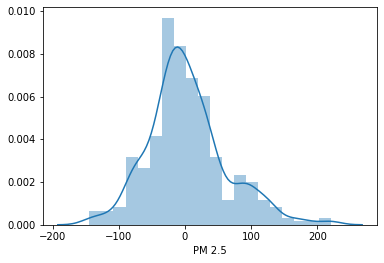

In [56]:
sns.distplot(y_test-pred)

In [57]:
import pickle